this notebook serves as validation of the 'group GLM' class for parallel fitting of models. 

In [1]:
import tensorflow as tf
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sess = tf.Session()

In [3]:
from glm_utils import *

num_neurons = 10
num_features = 50
T = 100000
stim = np.random.normal(0, scale = 2, size = [T, num_features])

weight_mat = np.zeros([num_features, num_neurons])
weight_inits = np.zeros_like(weight_mat)
y = np.zeros([T, num_neurons])

for i in range(num_neurons):
    s, w, t = generate_data(T, num_features, filt_amp = np.random.randint(2, 20), noise_model='exponential', non_lin = sigmoid, stim = stim)

    weight_mat[:, i] = w
    weight_inits[:, i] = np.linalg.pinv(s).dot(t)
    
    y[:, i] = t

glm_utils.py:82: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if stim == None:


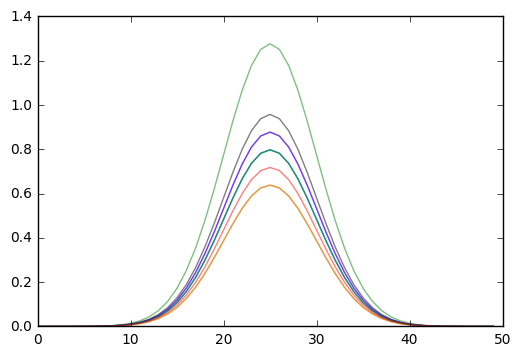

In [4]:
plt.plot(weight_mat, alpha = .5);

In [5]:
import group_glm as gm

model = gm.exponential_GLM(weight_inits.reshape([num_features, num_neurons]), non_lin = tf.nn.sigmoid,  
                        train_params = True, lr = 1e-3, alpha = 0)


L, l = model.fit(stim,y, max_iters = 1000, batch_size=100000)

0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:07:42


In [77]:
import glm_model as gm_

weights_ = np.zeros([num_features, num_neurons])

inits = weight_inits.reshape([num_features, num_neurons])
                             
for i in range(num_neurons):
    model = gm_.exponential_GLM(inits[:, i].reshape([num_features, 1]), non_lin = tf.nn.sigmoid, 
                                train_params = True, lr = 1e-3, alpha = 0)
                             
    L, l = model.fit(stim, y[:, i, np.newaxis], max_iters=1000, batch_size = 100000)
    
    w_, _,_ = model.get_params()
                             
    weights_[:, i] = np.squeeze(w_)                             
        

0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:02:34
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:01:07
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:00:53
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:01:01
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:02:53
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:02:02
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:01:06
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:02:30
0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:01:51
0

In [78]:
stim.shape

(100000, 50)

(1000, 10)


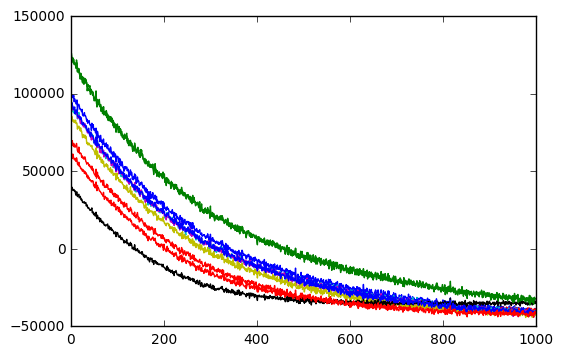

In [90]:
l = np.array(L)

print l.shape

plt.plot(l);

In [6]:
w, o, c = model.get_params()

In [7]:
w = w.reshape(num_features, num_neurons)

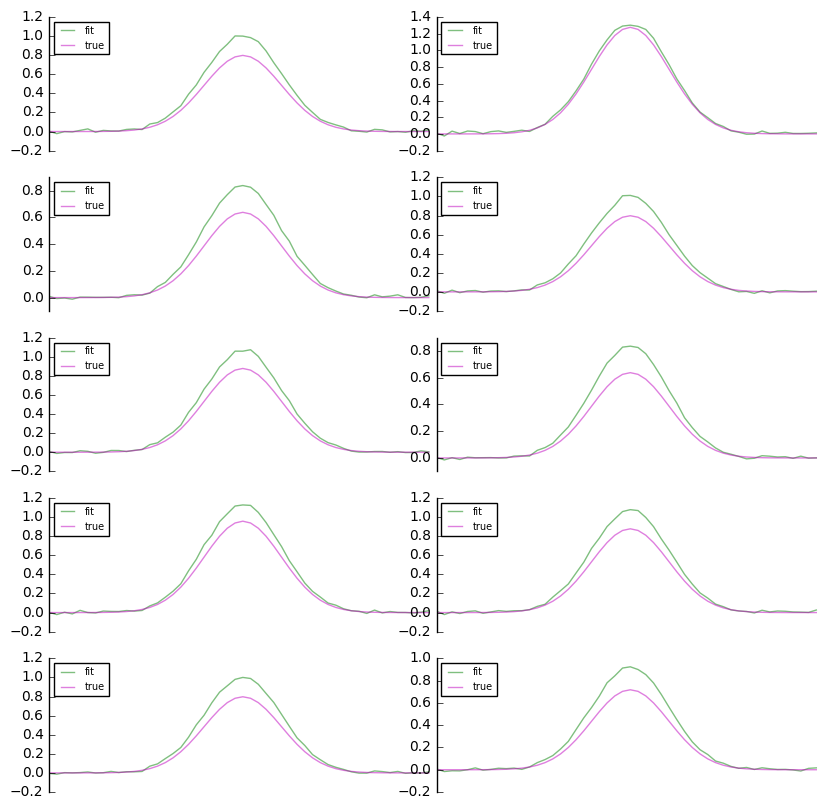

In [9]:
num_rows, num_cols = 5, 2


plt.figure(figsize = [10, 10])
gs, ax = gridplot(num_rows, num_cols)

for i, axes in enumerate(ax):
    axes.plot(w[:, i], c = 'g', linewidth = 1, alpha = .5, label = 'fit')
    #axes.plot(weight_inits[:, i], c = 'g', linewidth = 1, alpha = .5, label = 'inits')
    axes.plot(weight_mat[:, i], c = 'm', linewidth = 1, alpha = .5, label = 'true')
    #axes.plot(weights_[:, i], c = 'r', linewidth = 1, alpha = .5, label = 'i fit')
    axes.legend(fontsize = 7, loc = 'upper left')
    simpleaxis(axes)

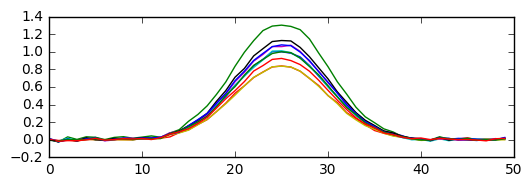

In [10]:
plt.subplot(211)
plt.plot(w);
